# 3.6 Two issues with the negative gradient as a descent direction

- The negative gradient is not without its weaknesses as a descent direction, and in this Section we outline two significant problems with it that can arise in practice.  


- Like any *vector* the negative gradient always consists fundamentally of a *direction* and a *magnitude*. 

<figure>
<img src= '../../mlrefined_images/math_optimization_images/direction_magnitude.png' width="60%" height="auto"/>
</figure>

- Depending on the function being minimized either one of these attributes - or both - can present challenges when using the negative gradient as a descent direction.  


- The *direction* of the negative gradient can *rapidly oscillate* or *zig-zag* during a run of gradient descent, often producing *zig-zagging* steps that take considerable time to reach a near mininum point.  


- The *magnitude* of the negative gradient can *vanish rapidly* near stationary points, leading gradient descent to slowly crawl near minima and saddle points.  

- These two problems present themselves in machine learning because many of the functions we aim to minimize have *long narrow valleys*, long flat areas where the contours of a function become increasingly parallel. 

- You can toggle the code on and off in this presentation via the button below.

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
# This code cell will not be shown in the HTML version of this notebook
# import standard tools
import sys
sys.path.append('../../')
import autograd.numpy as np
import time

# import custom plotting tools
from mlrefined_libraries import math_optimization_library as optlib
from mlrefined_libraries import calculus_library as callib
static_plotter = optlib.static_plotter.Visualizer();
anime_plotter = optlib.animation_plotter.Visualizer();

# The next three lines are needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

In [3]:
## This code cell will not be shown in the HTML version of this notebook
# using an automatic differentiator - like the one imported via the statement below - makes coding up gradient descent a breeze
from autograd import numpy as np
from autograd import value_and_grad 

# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha_choice,max_its,w):
    # compute the gradient function of our input function - note this is a function too
    # that - when evaluated - returns both the gradient and function evaluations (remember
    # as discussed in Chapter 3 we always ge the function evaluation 'for free' when we use
    # an Automatic Differntiator to evaluate the gradient)
    gradient = value_and_grad(g)

    # run the gradient descent loop
    weight_history = []      # container for weight history
    cost_history = []        # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
        
        # evaluate the gradient, store current weights and cost function value
        cost_eval,grad_eval = gradient(w)
        weight_history.append(w)
        cost_history.append(cost_eval)

        # take gradient descent step
        w = w - alpha*grad_eval
            
    # collect final weights
    weight_history.append(w)
    # compute final cost function value via g itself (since we aren't computing 
    # the gradient at the final step we don't get the final cost function value 
    # via the Automatic Differentiatoor) 
    cost_history.append(g(w))  
    return weight_history,cost_history

##  The (negative) gradient direction points perpendicular to the contours of any function

- A fundamental property of the (negative) gradient direction is that it always points perpendicular the contours of a function.  


- This statement is universally true - and holds for *any* function and at *all* of its inputs.


- We illustrate this fact via several examples below.

#### <span style="color:#a50e3e;">Example. </span>  Gradient descent directions on the contour plot of a quadratic function

- Below we show $g\left(\mathbf{w}\right) = w_0^2 + w_1^2 + 2$, with  gradient descent directions defined at three random points.  


- The contour plot is colored *blue* - with darker regions indicating where the function takes on larger values, and lighter regions where it takes on lower values.  


- Each of the points we choose are highlighted in a unique color, with the contour on which they sit on the function colored in the same manner.  


- The *descent* direction defined by the gradient is perpendicular at each point is drawn as an arrow and the tangent line to the contour at each input is also drawn.

<IPython.core.display.Javascript object>


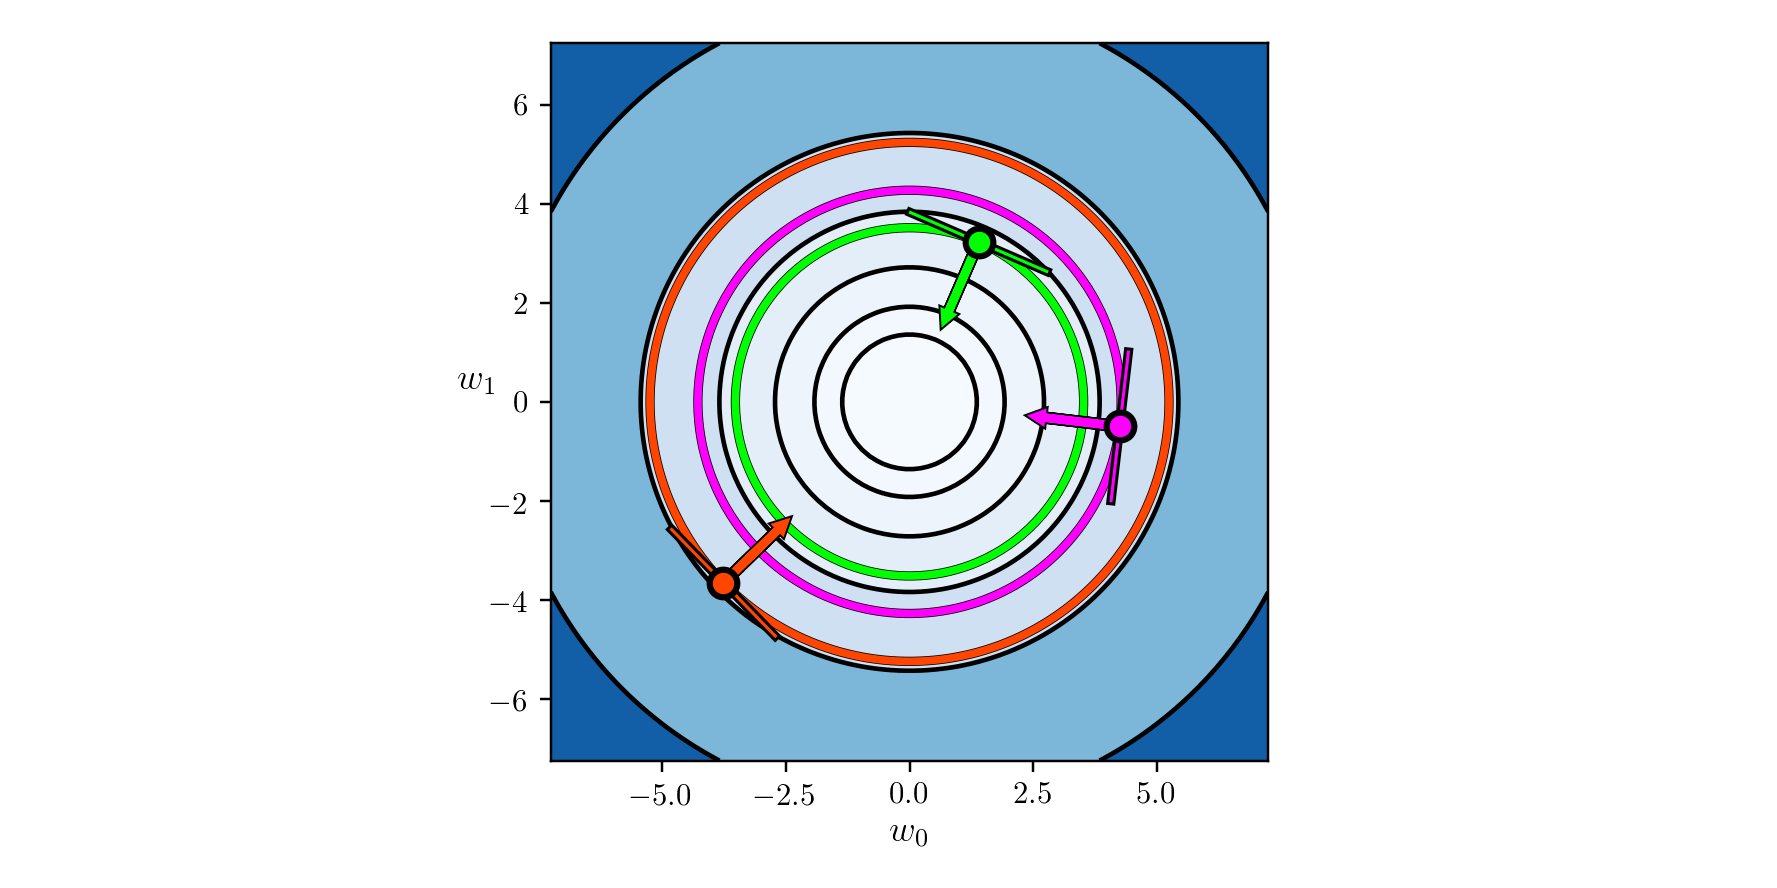

In [3]:
# This code cell will not be shown in the HTML version of this notebook
# function to plot
g = lambda w: w[0]**2 + w[1]**2 + 2

# random points at which to compute the gradient
pts = np.array([[ 4.24698761,  1.39640246, -3.75877989],
               [-0.49560712,  3.22926095, -3.65478083]])

# produce contour plot with gradients
callib.perp_gradient_viewer.illustrate_gradients(g,pts);

#### <span style="color:#a50e3e;">Example. </span>  Gradient descent directions on the contour plot of a wavy function

Here we show the contour plot and gradient descent directions in the same manner as the previous example for 

$$
g\left(\mathbf{w}\right) = w_0^2 + w_1^2 + 2\text{sin}\left(1.5\left(w_0 + w_1\right)\right)^2 + 2.
$$


<IPython.core.display.Javascript object>


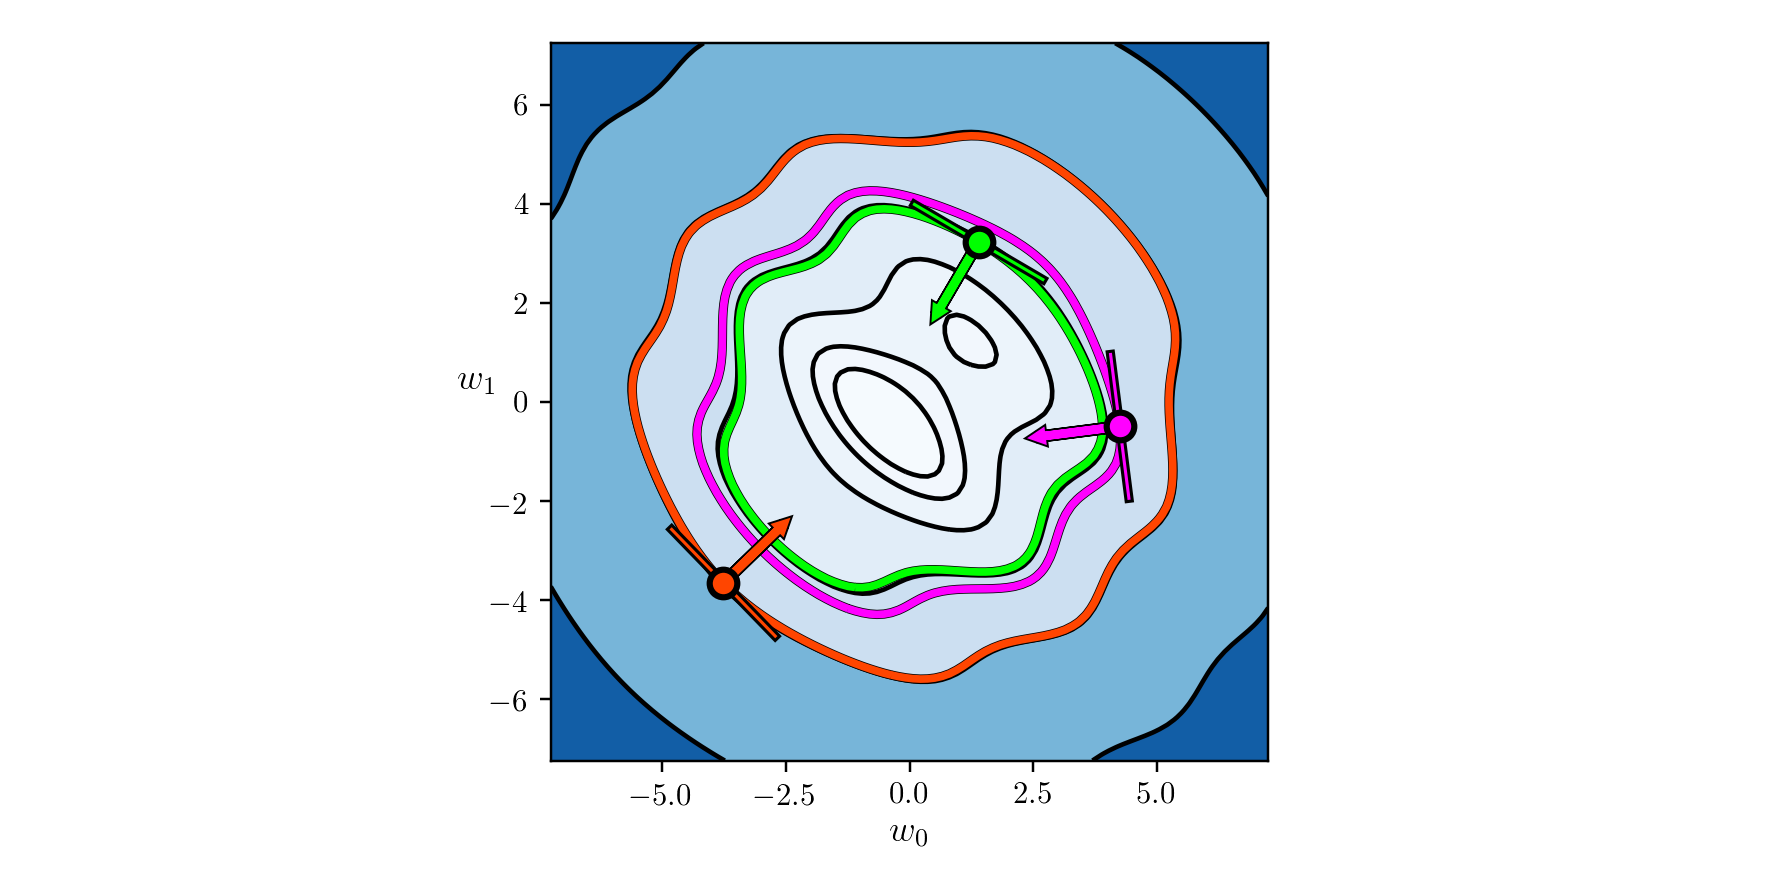

In [4]:
# This code cell will not be shown in the HTML version of this notebook
# function to plot
g = lambda w: w[0]**2 + w[1]**2 + 2*np.sin(1.5*(w[0] + w[1])) + 2

# points at which to compute the gradient
pts = np.array([[ 4.24698761,  1.39640246, -3.75877989],
               [-0.49560712,  3.22926095, -3.65478083]])

# produce contour plot with gradients
callib.perp_gradient_viewer.illustrate_gradients(g,pts)

#### <span style="color:#a50e3e;">Example. </span>  Gradient descent directions on the contour plot of a standard non-convex test function

- Finally we show the same sort of plot as in the previous example using the function

$$
g\left(\mathbf{w}\right) = \left(w_0^2 + w_1 - 11 \right)^2  + \left( w_0 + w_1^2 - 6 \right)^2
$$

<IPython.core.display.Javascript object>


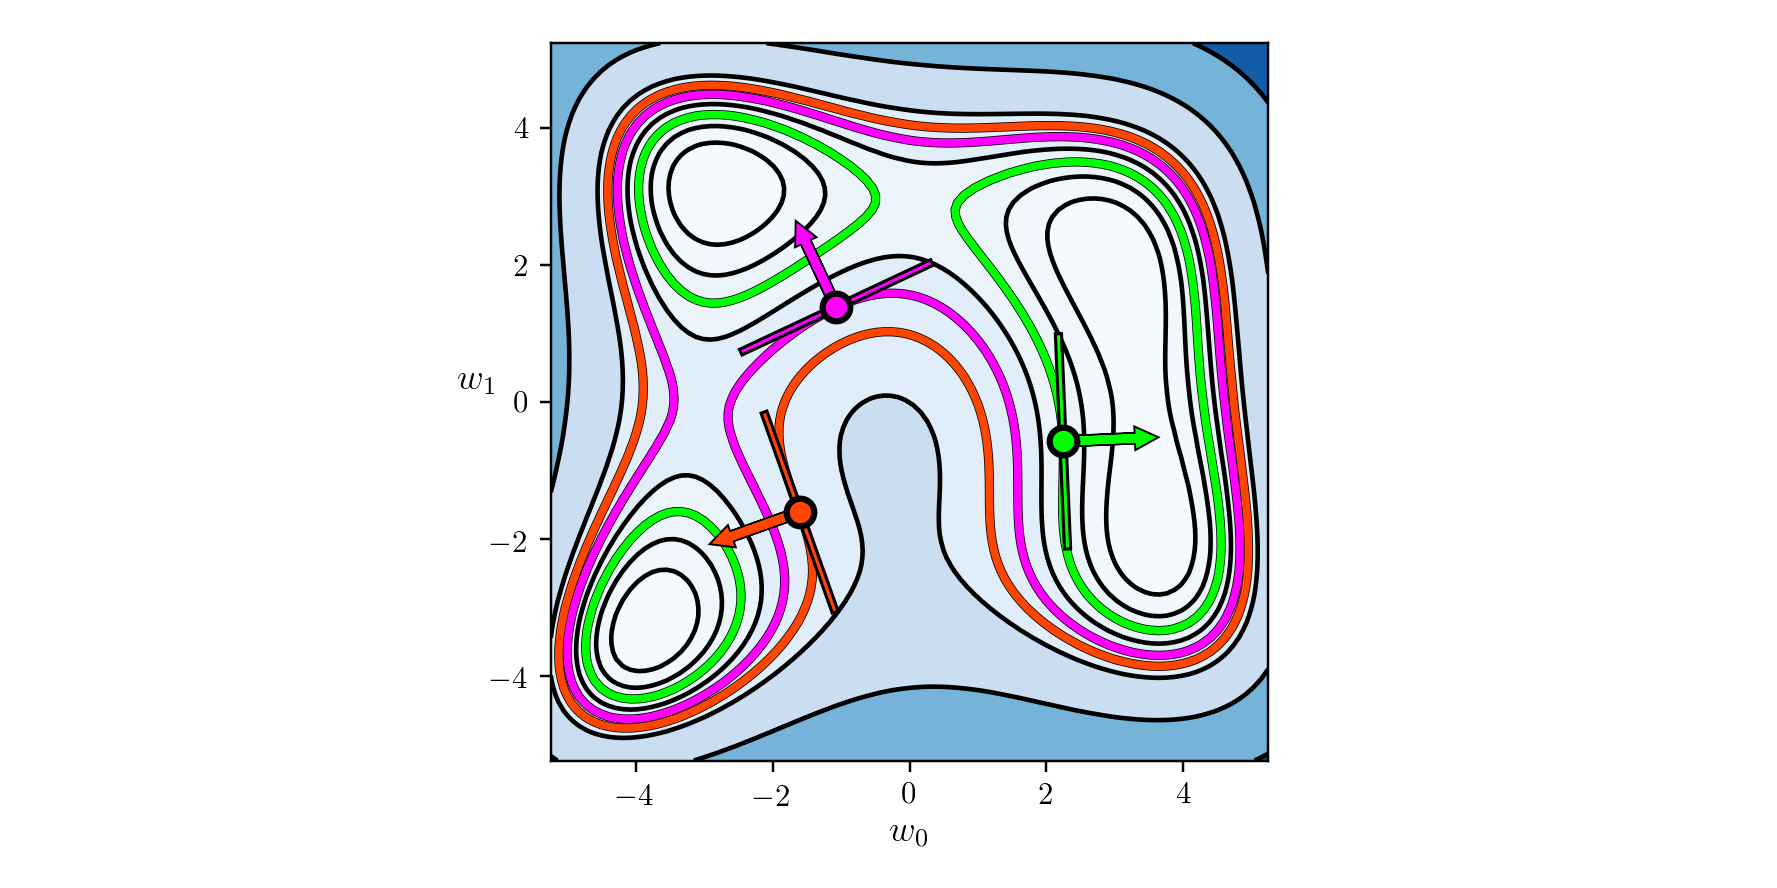

In [5]:
# This code cell will not be shown in the HTML version of this notebook
# function to plot
g = lambda w: (w[0]**2 + w[1] - 11)**2 + (w[0] + w[1]**2 - 7)**2

# points at which to compute the gradient
pts = np.array([[ 2.2430266 , -1.06962305, -1.60668751],
               [-0.57717812,  1.38128471, -1.61134124]])

# produce contour plot with gradients
callib.perp_gradient_viewer.illustrate_gradients(g,pts)

## The 'zig-zagging' behavior of gradient descent

- Because the negative gradient *points perpendicular to the contours of a function* can make the negative gradient direction *oscillate rapidly* or *zig-zag* during a run of gradient descent.  


- This in turn can cause zig-zagging behavior in the gradient descent steps themselves.


- *Too much* zig-zagging slows minimization progress and - when it occurs - many gradient descent steps are required to adequately minimize a function. 

#### <span style="color:#a50e3e;">Example. </span>  Zig-zagging behavior of gradient descent on three simple quadratic functions

- We illustrate the zig-zag behavior of gradient descent with three $N = 2$ dimensional quadratic 

$$
g(\mathbf{w}) = a + \mathbf{b}^T\mathbf{w} + \mathbf{w}^T\mathbf{C}\mathbf{w}.
$$


- Not much progress is made with the third quadratic at all due to the large amount of zig-zagging.


- We can also see the cause of this zig-zagging: the negative gradient direction constantly points perpindicular to the contours of the function (this can be especially seen in the third case).  

<IPython.core.display.Javascript object>


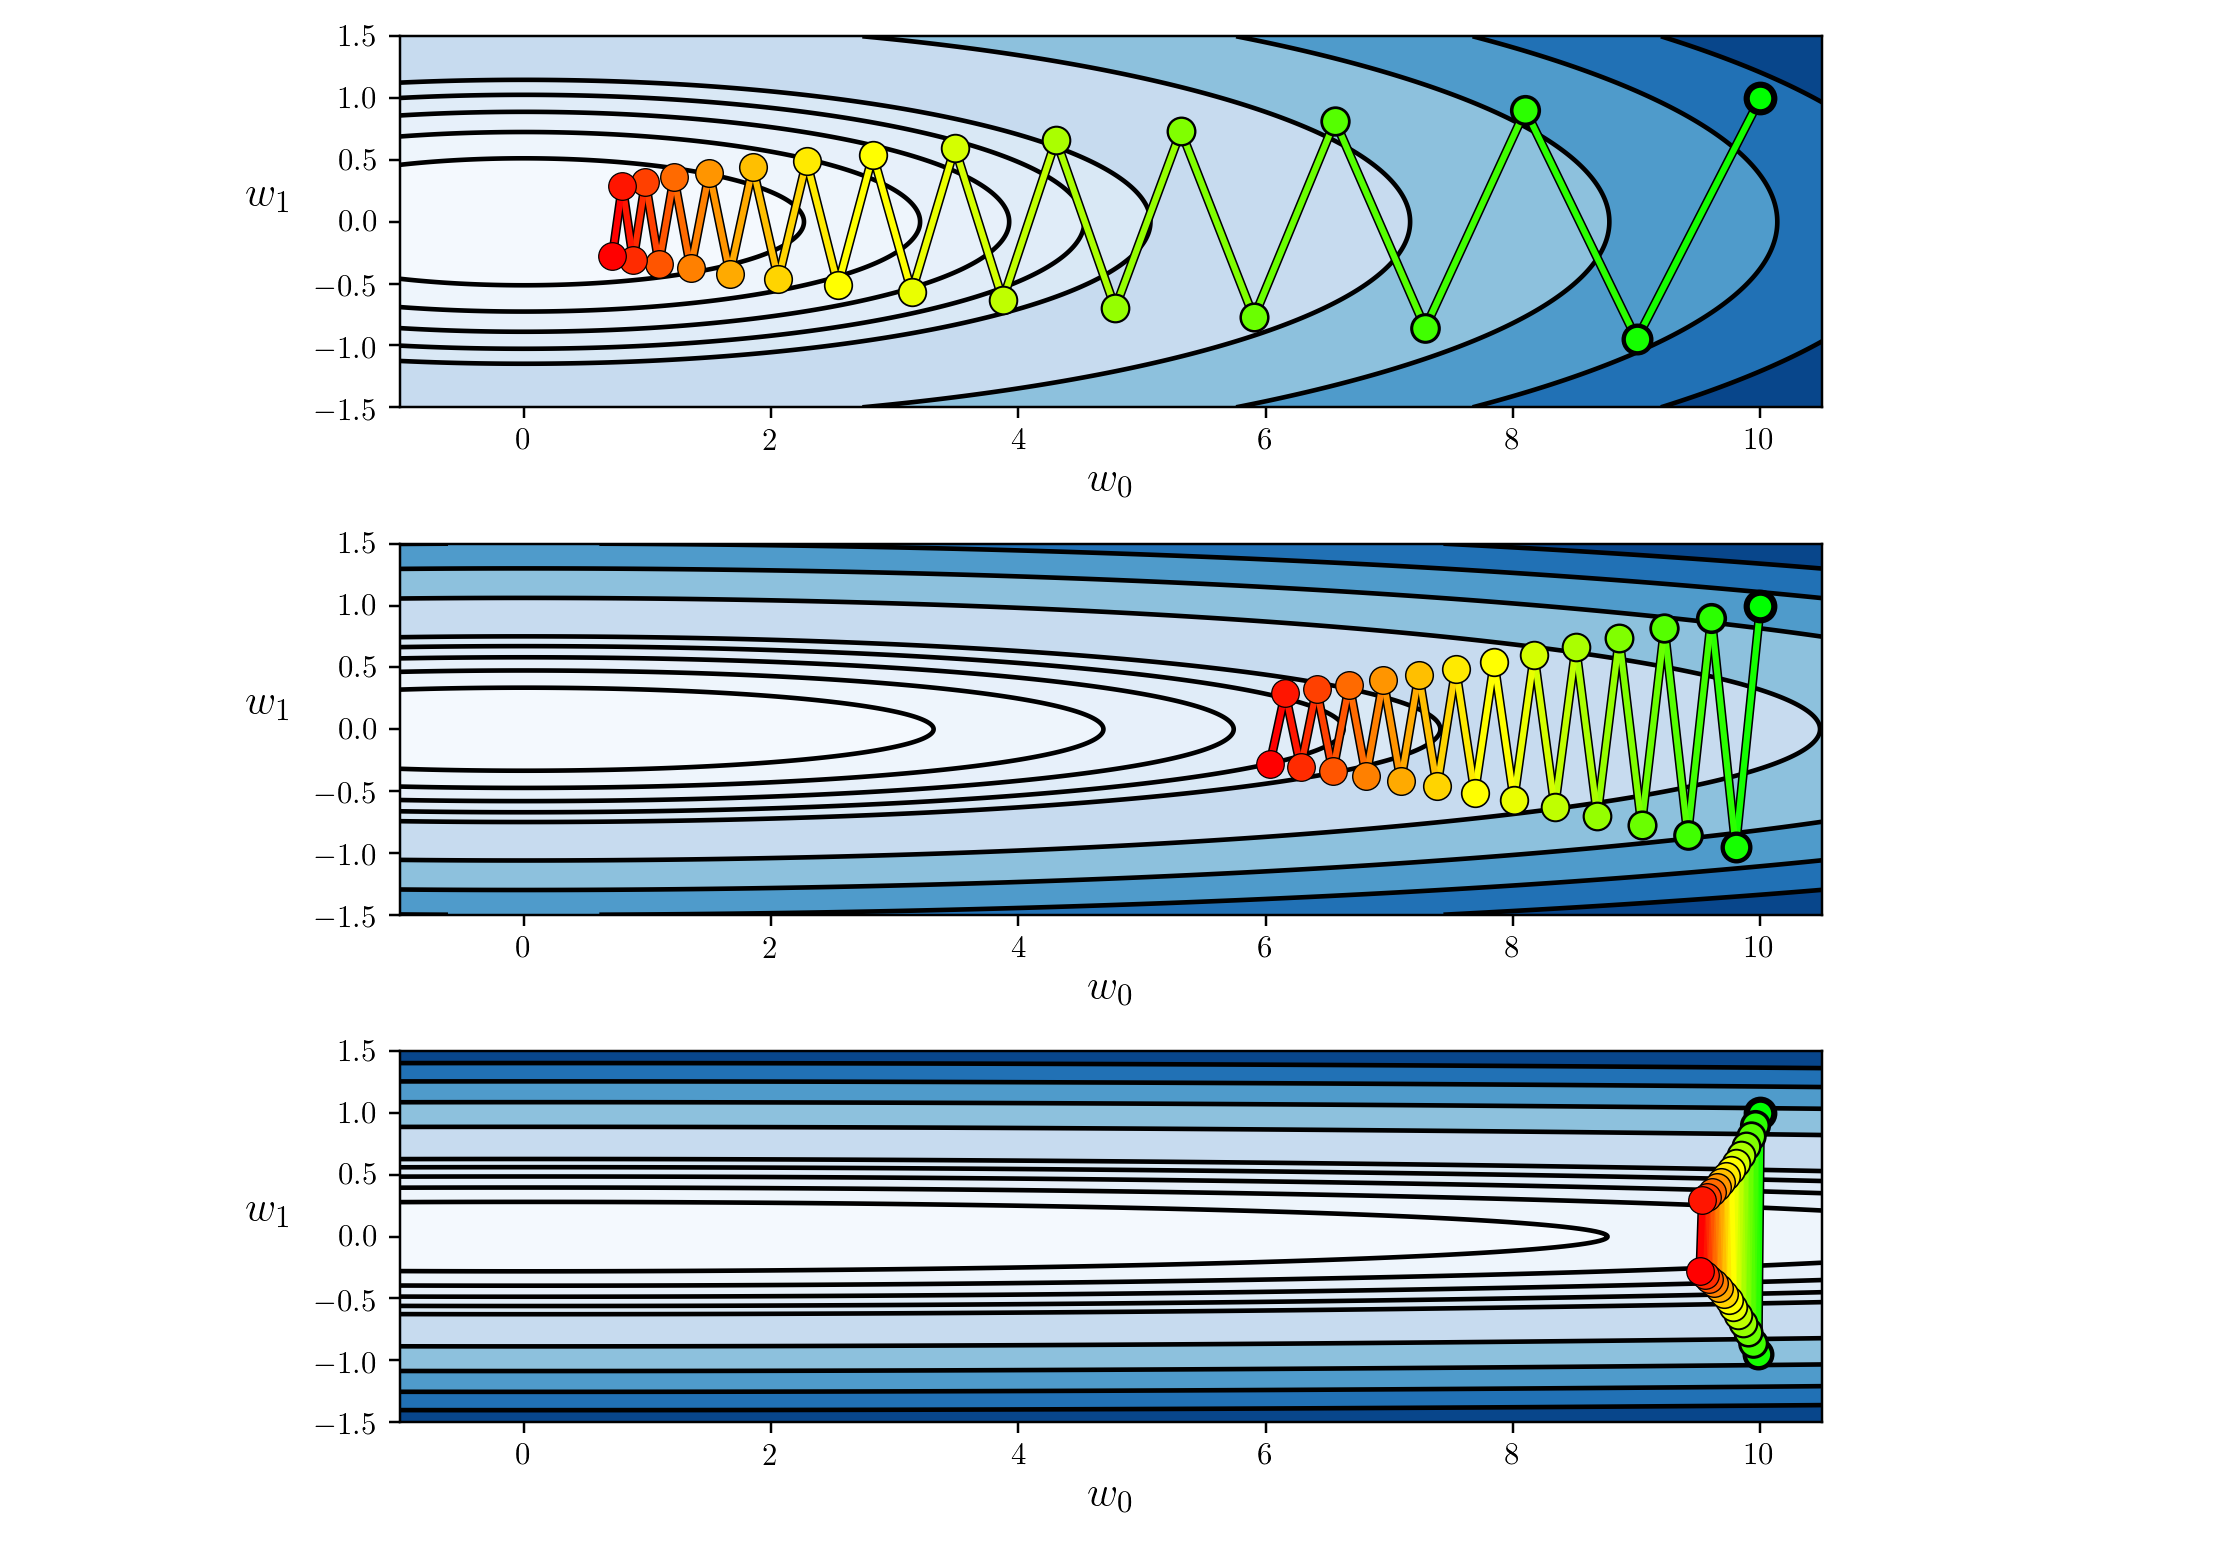

In [6]:
# This code cell will not be shown in the HTML version of this notebook
#### minimize first quadratic ####
# define constants for a N=2 input quadratic
a1 = 0
b1 = 0*np.ones((2,1))
C1 = np.array([[0.5,0],[0,9.75]])

# a quadratic function defined using the constants above
g1 = lambda w: (a1 + np.dot(b1.T,w) + np.dot(np.dot(w.T,C1),w))[0]

# run gradient descent 
w = np.array([10.0,1.0]); max_its = 25; alpha_choice = 10**(-1);
weight_history_1,cost_history_1 = gradient_descent(g1,alpha_choice,max_its,w)

#### minimize second quadratic ####
# define constants for a N=2 input quadratic
a2 = 0
b2 = 0*np.ones((2,1))
C2 = np.array([[0.1,0],[0,9.75]])

# a quadratic function defined using the constants above
g2 = lambda w: (a2 + np.dot(b2.T,w) + np.dot(np.dot(w.T,C2),w))[0]

# run gradient descent 
weight_history_2,cost_history_2 = gradient_descent(g2,alpha_choice,max_its,w)

#### minimize third quadratic ####
# define constants for a N=2 input quadratic
a3 = 0
b3 = 0*np.ones((2,1))
C3 = np.array([[0.01,0],[0,9.75]])

# a quadratic function defined using the constants above
g3 = lambda w: (a3 + np.dot(b3.T,w) + np.dot(np.dot(w.T,C3),w))[0]

# run gradient descent 
weight_history_3,cost_history_3 = gradient_descent(g3,alpha_choice,max_its,w)

# show run in both three-dimensions and just the input space via the contour plot
histories = [weight_history_1,weight_history_2,weight_history_3]
gs = [g1,g2,g3]
static_plotter.two_input_contour_vert_plots(gs,histories,num_contours = 20,xmin = -1,xmax = 10.5,ymin = -1.5,ymax = 1.5)

- It is the true that we can ameilorate this zig-zagging behavior by *reducing the steplength value*, as shown below.


- However this does not solve the underlying problem that zig-zagging produces - which is slow convergence.  


- Typically in order to ameliorate or even eliminate zig-zagging this way requires a very small steplength, which leads back to the fundamental problem of slow convergence.  


<IPython.core.display.Javascript object>


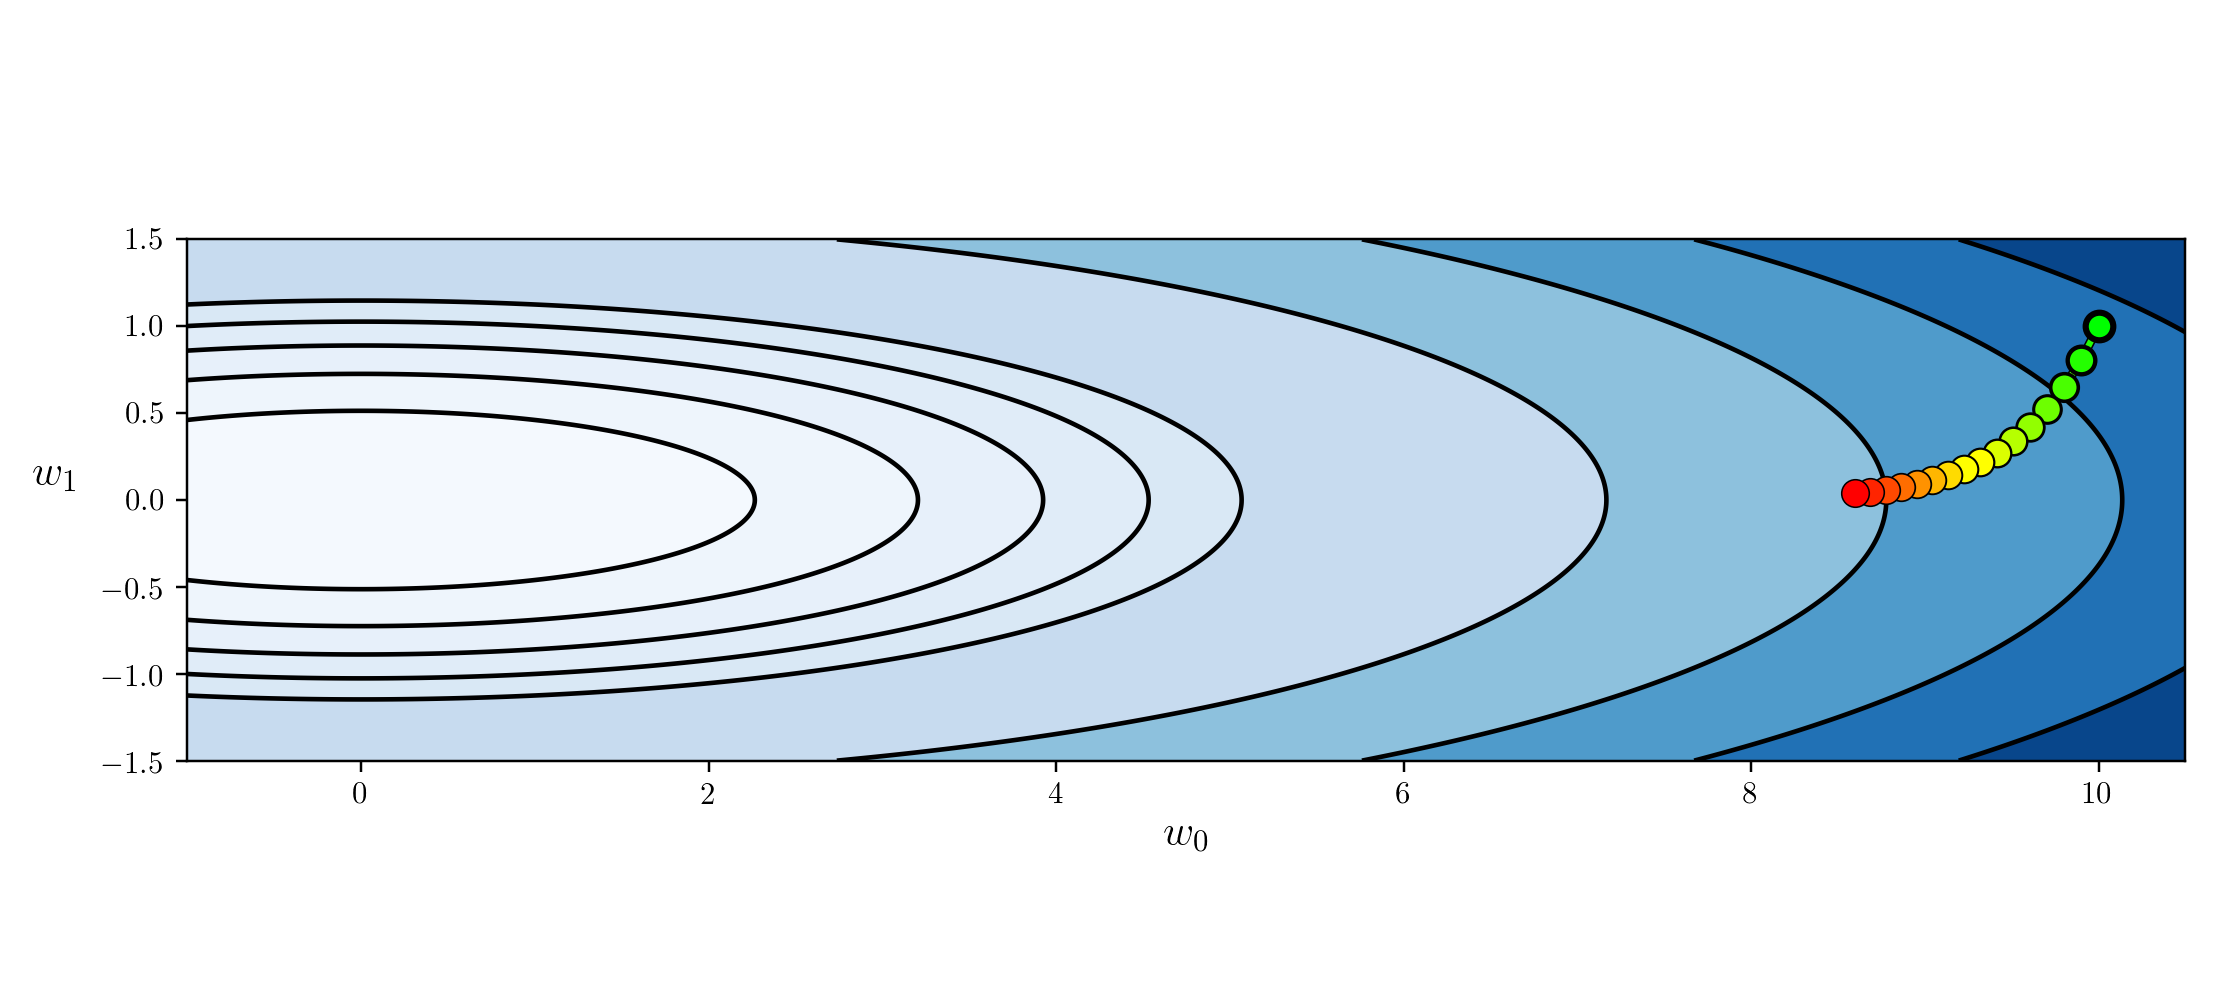

In [10]:
# This code cell will not be shown in the HTML version of this notebook
a1 = 0
b1 = 0*np.ones((2,1))
C1 = np.array([[0.5,0],[0,9.75]])

# a quadratic function defined using the constants above
g1 = lambda w: (a1 + np.dot(b1.T,w) + np.dot(np.dot(w.T,C1),w))[0]

# run gradient descent 
w = np.array([10.0,1.0]); max_its = 15; alpha_choice = 10**(-2);
weight_history_1,cost_history_1 = gradient_descent(g1,alpha_choice,max_its,w)

# plot contour and weight history
static_plotter.two_input_contour_plot(g1,weight_history_1,show_original = False,num_contours = 20,xmin = -1,xmax = 10.5,ymin = -1.5,ymax = 1.5)

## The slow-crawling behavior of gradient descent

- The *first order condition for optimality* discussed in [Section 3.2](https://jermwatt.github.io/machine_learning_refined/notes/3_First_order_methods/3_2_First.html), the (negative) gradient vanishes at stationary points. 



- The vanishing behavior of the negative gradient magnitude near stationary points has a natural consequence for gradient descent steps - they progress very slowly, or 'crawl', near stationary points. 



- This occurs because *unlike* the zero order methods discussed in the previous Chapter, *the distance traveled during each step of gradient descent is not completely determined by the steplength / learning rate value $\alpha$*.  

-  This means that gradient descent steps make little progress towards minimization when near a stationary point


- Thus depending on the function many of them may be required to complete minimization.

#### <span style="color:#a50e3e;">Example. </span>  Slow-crawling behavior of gradient descent near the minimum of a function

Below we show another example run of gradient descent using a function 

$$
g(w) = w^4 + 0.1
$$

whose minimum is at the origin.  


- This example shows how steps can be quite large far from a stationary point, but then get very small and crawls as we get closer and closer to the minimum of this function.  



<IPython.core.display.Javascript object>


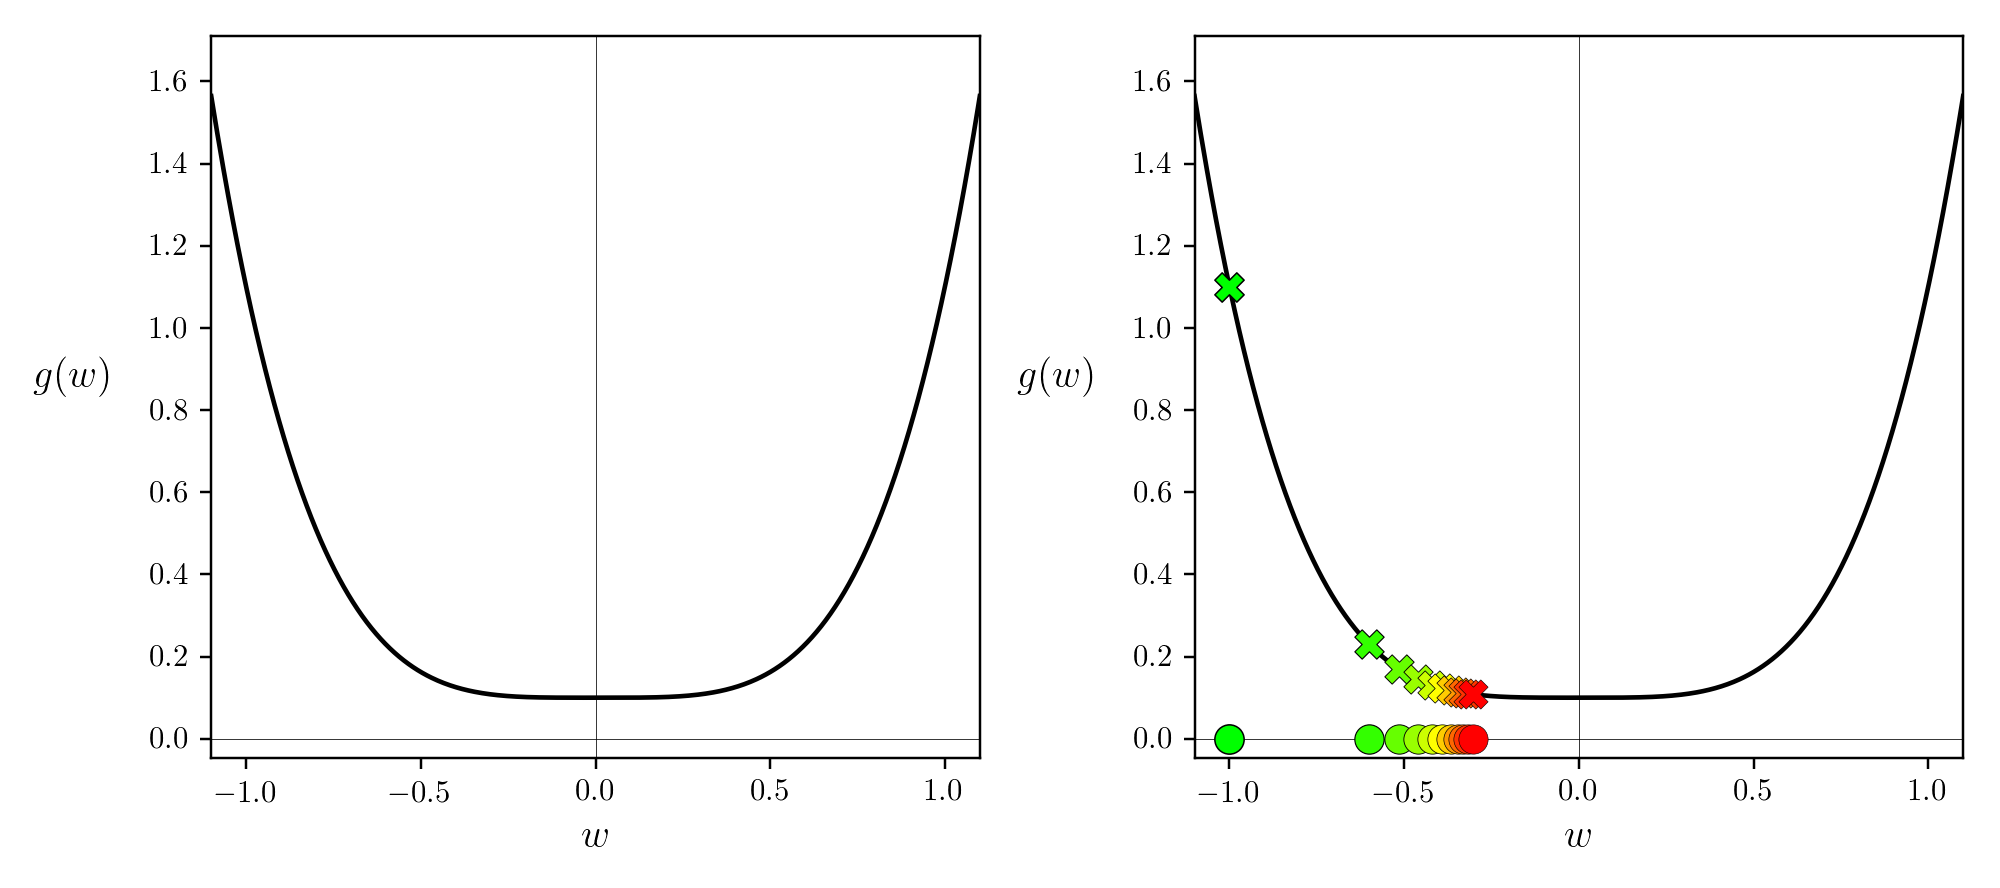

In [11]:
# This code cell will not be shown in the HTML version of this notebook
# what function should we play with?  Defined in the next line.
g = lambda w: w**4 + 0.1

# run gradient descent 
w = -1.0; max_its = 10; alpha_choice = 10**(-1);
weight_history,cost_history = gradient_descent(g,alpha_choice,max_its,w)

# make static plot showcasing each step of this run
static_plotter.single_input_plot(g,[weight_history],[cost_history],wmin = -1.1,wmax = 1.1)

#### <span style="color:#a50e3e;">Example. </span> Slow-crawling behavior of gradient descent near saddle points

- Now we illustrate the crawling issue of gradient descent near saddle points using the non-convex function

$$
g(w) = \text{maximum}(0,(3w - 2.3)^3 + 1)^2 + \text{maximum}(0,(-3w + 0.7)^3 + 1)^2
$$


- This function has a minimum at $w= \frac{1}{2}$ and saddle points at $w = \frac{7}{30}$ and $w = \frac{23}{30}$.  


- The fact that gradient descent crawls as it approaches this saddle point since the magnitude of the gradient vanishes here.

<IPython.core.display.Javascript object>


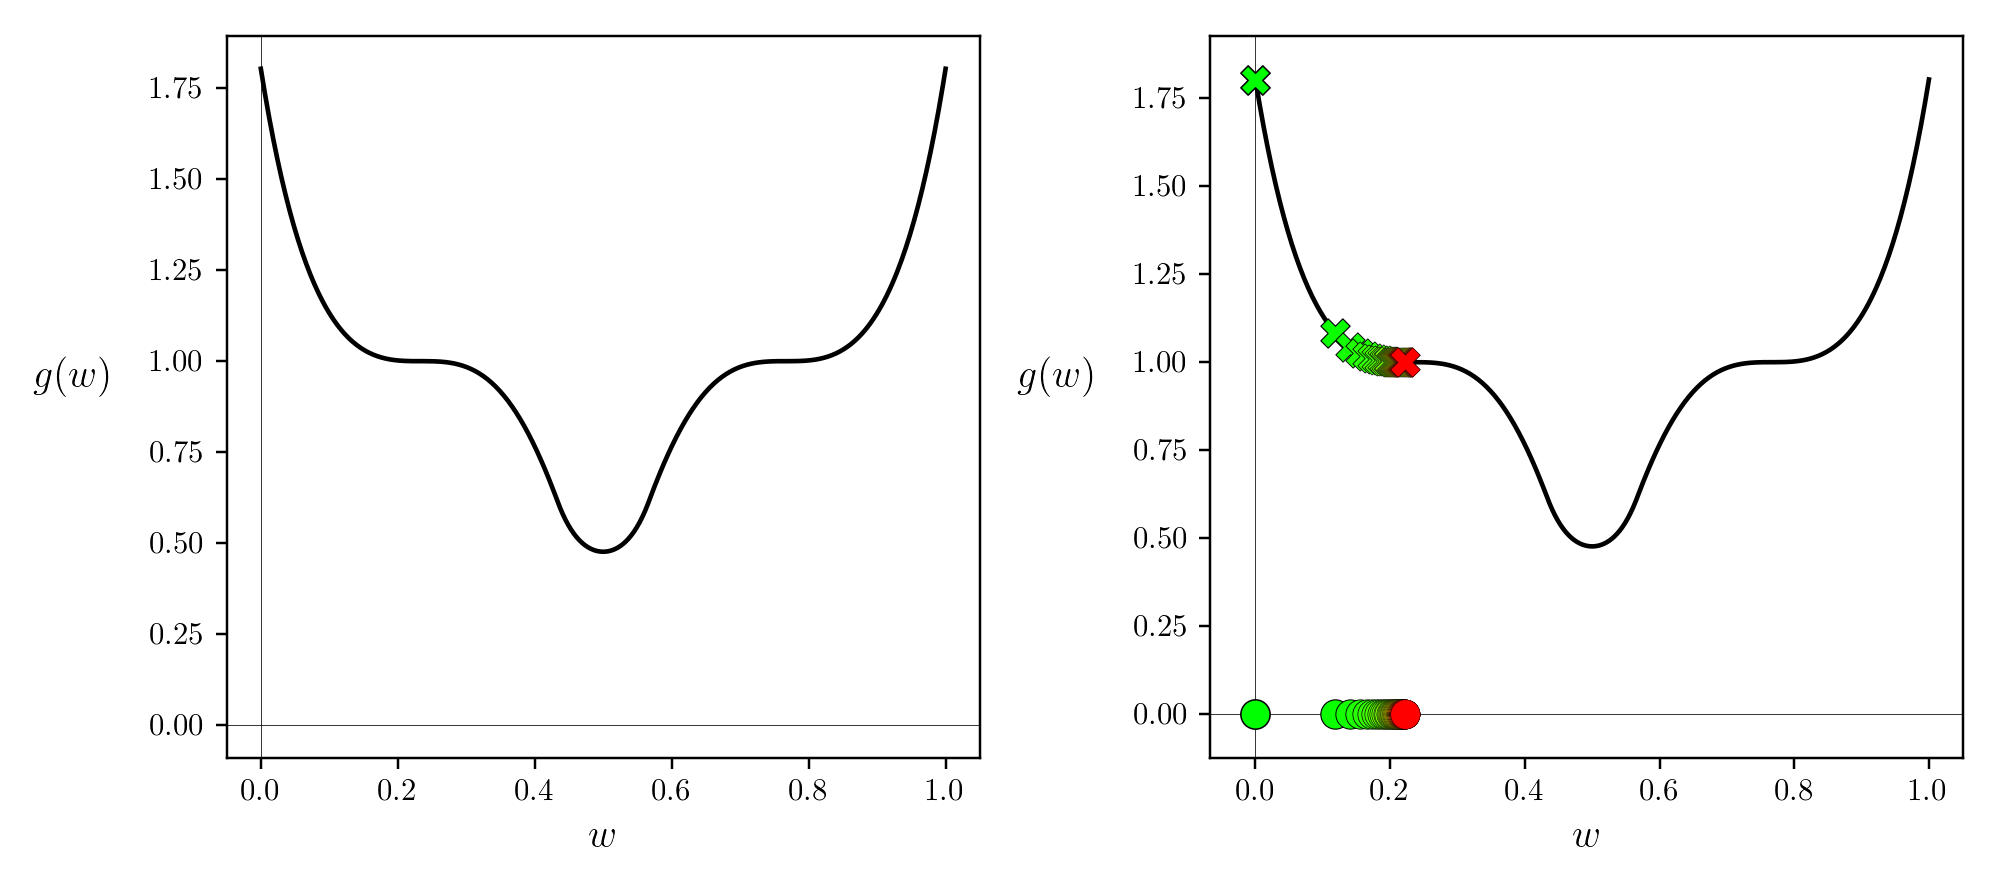

In [12]:
# This code cell will not be shown in the HTML version of this notebook
g = lambda w: np.maximum(0,(3*w - 2.3)**3 + 1)**2 + np.maximum(0, (-3*w + 0.7)**3 + 1)**2

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.gradient_descent_demos.visualizer();

# draw function and gradient descent run
demo.draw_2d(g=g, w_inits = [0],steplength = 0.01,max_its = 50,version = 'unnormalized',wmin = 0,wmax = 1.0)

#### <span style="color:#a50e3e;">Example. </span> Slow-crawling behavior of gradient descent in large flat regions of a function

- As another example, we attempt to minimize the function

$$
g(w_0,w_1) = \text{tanh}(4w_0 + 4w_1) + \text{max}(1,0.4w_0^2) + 1
$$

via gradient descent starting at the point $\mathbf{w}^0 = \begin{bmatrix} 2 \\ 2 \end{bmatrix}$.  


- The magnitude of the gradient being almost zero here, we cannot make much progress employing $1000$ steps of gradient descent.

<IPython.core.display.Javascript object>


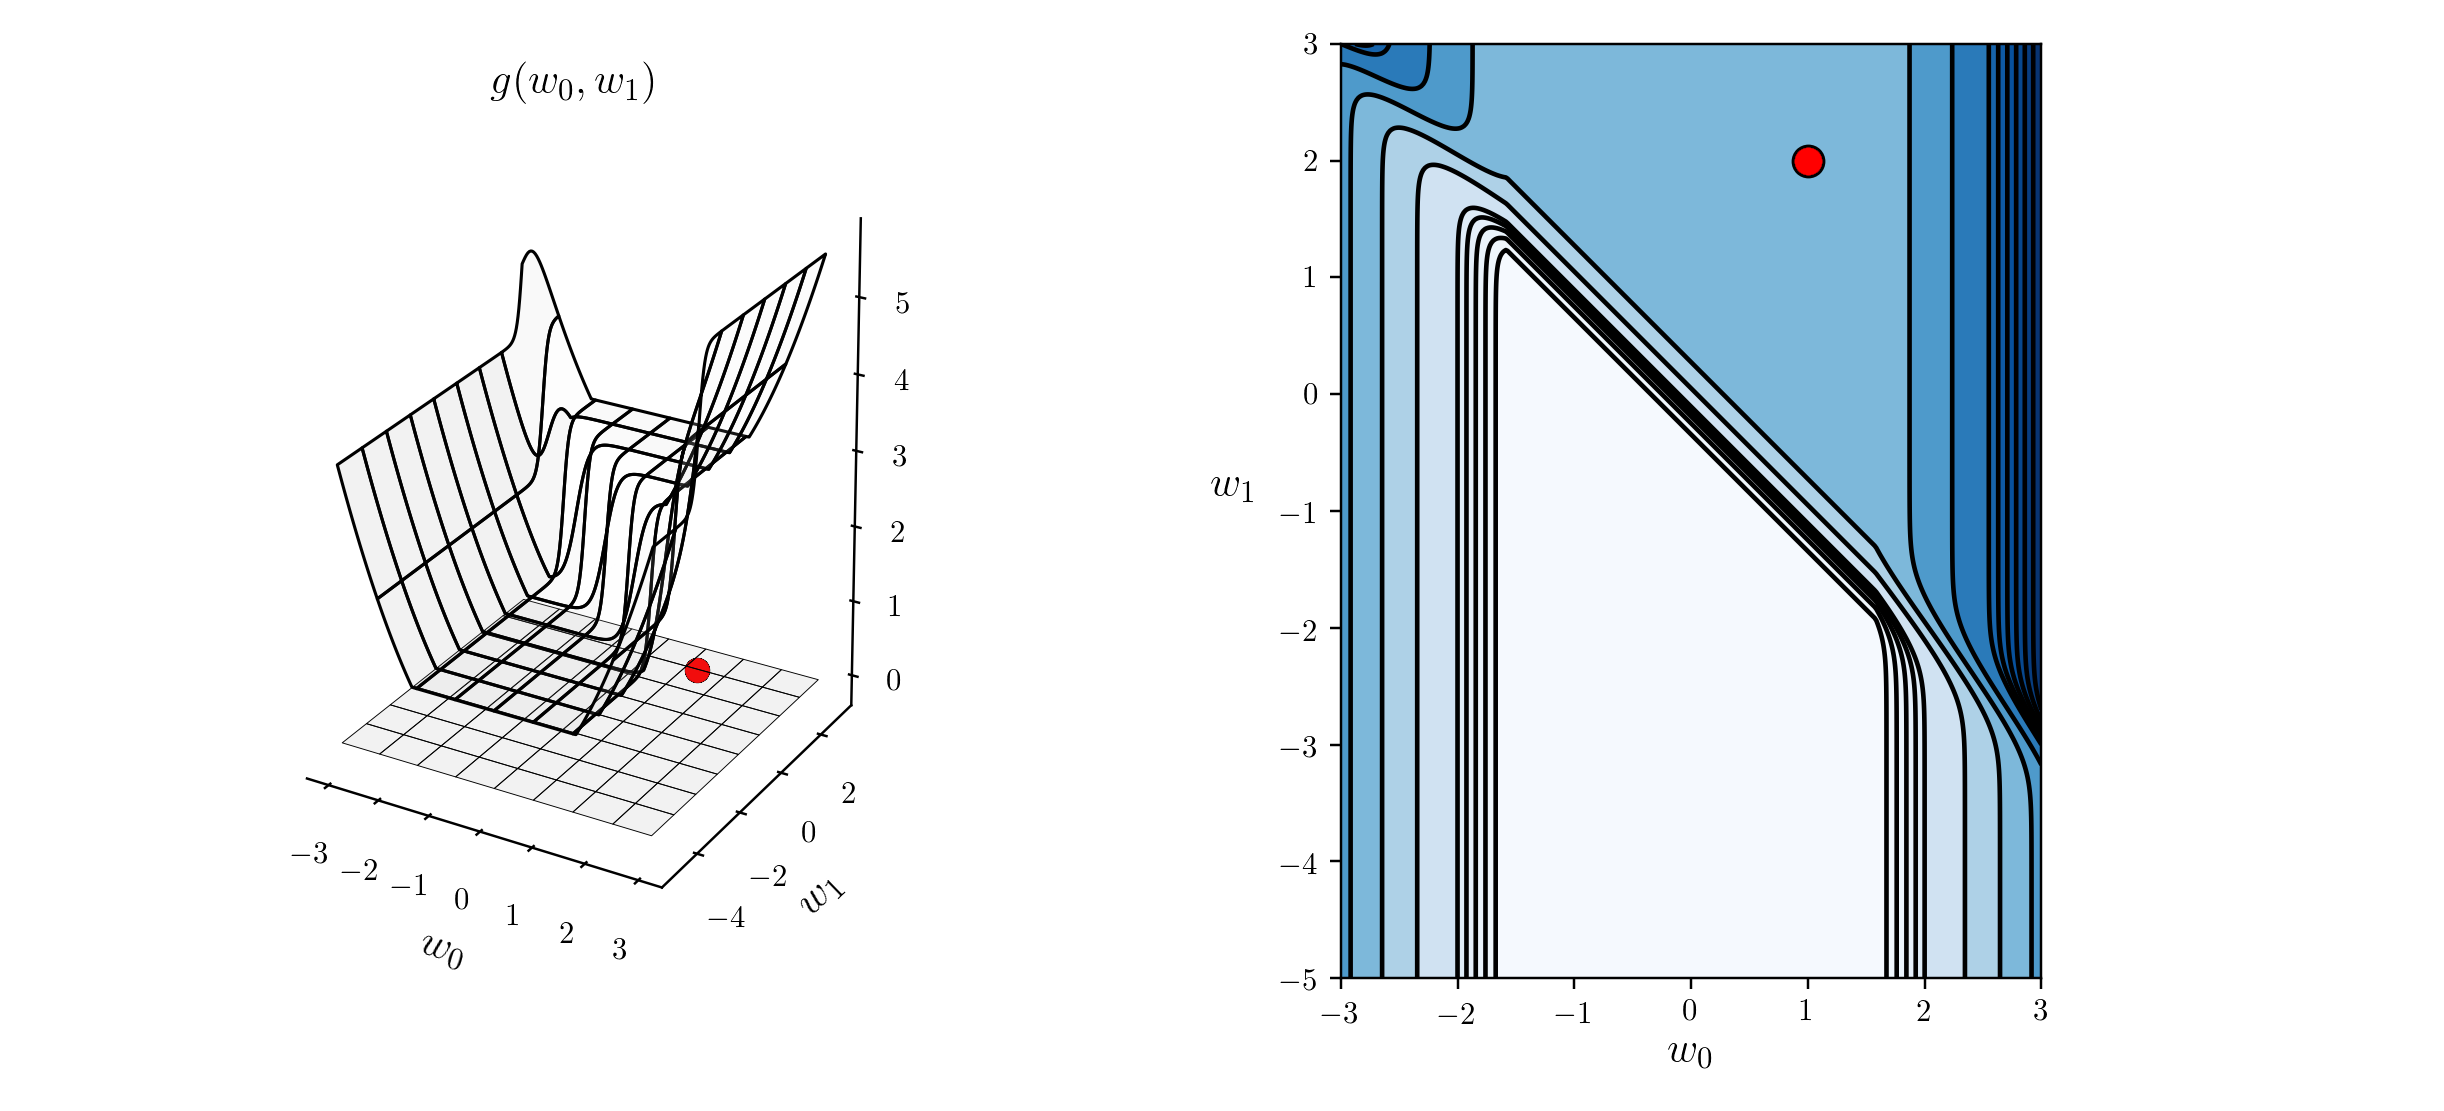

In [4]:
# This code cell will not be shown in the HTML version of this notebook
# define function
g = lambda w: np.tanh(4*w[0] + 4*w[1]) + max(0.4*w[0]**2,1) + 1
w = np.array([1.0,2.0]); max_its = 1000; alpha_choice = 10**(-1);
weight_history_1,cost_history_1 = gradient_descent(g,alpha_choice,max_its,w)

# plot contour and weight history
static_plotter.two_input_surface_contour_plot(g,weight_history_1,view = [20,300],num_contours = 20,xmin = -3,xmax = 3,ymin = -5,ymax = 3)